### 앙상블(Ensemble)
앙상블은 여러 개의 예측 모델을 결합하여 더 강력한 모델을 형성하는 기법을 의미합니다. 배깅과 부스팅은 모두 앙상블의 한 형태입니다. 앙상블은 개별 모델의 약점을 보완하고, 모델의 일반화 성능을 향상시키는 데 사용됩니다.	
따라서 배깅 부스팅 앙상블은 배깅과 부스팅 기법을 함께 사용하여 모델의 성능을 향상시키는 방법을 의미합니다. 이는 각각의 약점을 보완하고, 모델의 강점을 결합하여 더욱 강력한 예측 모델을 형성하는데 사용됩니다. RandomForest 등이 배깅과 결합된 앙상블 모델의 대표적인 예입니다.	

### 배깅(Bagging - Bootstrap Aggregating)  
배깅은 동일한 기계 학습 알고리즘을 사용하여 여러 개의 부트스트랩 샘플(Bootstrap Sample)을 생성하고, 각 샘플에 대해 개별 예측 모델을 학습합니다. 이후 이들 예측 모델을 결합하여 최종 예측을 수행합니다. 이 과정은 병렬적으로 수행될 수 있어서 계산적으로 효율적입니다. 대표적인 알고리즘으로는 랜덤 포레스트(Random Forest)가 있습니다.	
		
### 부스팅(Boosting):		
부스팅은 **약한 학습기(Weak Learner)**를 이용해 여러 개의 예측 모델을 **순차적으로** 학습시키는 앙상블 기법입니다. 각 모델은 이전 모델의 오차를 보완하도록 학습됩니다. 예를 들어, AdaBoost(Adaptive Boosting)는 이전 모델이 잘못 분류한 샘플에 가중치를 부여하여 다음 모델을 학습시키고, Gradient Boosting은 잔차(residual)를 예측하는 모델을 학습하여 점차적으로 오차를 줄여가는 방식으로 작동합니다.	

### 배깅(Bagging)과 부스팅(Boosting)에서의 n_estimators 차이  
배깅(Bagging)과 부스팅(Boosting)에서의 n_estimators 매개변수는 모델에서 사용할 개별 분류기의 개수를 나타냅니다. 그러나 이 두 기법에서의 이 매개변수의 역할에는 차이가 있습니다.

#### 배깅에서의 n_estimators
배깅에서 n_estimators는 앙상블에 사용할 분류기의 개수를 지정합니다.
각각의 분류기는 독립적으로 훈련되며, 예측 결과는 이들 분류기의 평균(회귀) 또는 다수결 투표(분류)로 결정됩니다.
더 많은 분류기를 사용할수록 앙상블의 분산(variance)이 줄어들고 안정적인 예측을 할 수 있게 됩니다.  

#### 부스팅에서의 n_estimators
부스팅에서 n_estimators는 약한 학습기(weak learner)를 순차적으로 추가하는 데 사용됩니다.
각각의 분류기는 이전 분류기가 만든 오류에 집중하여 훈련됩니다. 즉, 이전 분류기가 잘못 분류한 샘플에 가중치를 더 부여하여 다음 분류기가 더 잘 학습할 수 있도록 돕습니다.

더 많은 부스팅 반복을 수행할수록(즉, 더 많은 n_estimators), 모델의 복잡성이 증가하고 훈련 데이터에 대한 오류가 감소하며, 결국 성능이 향상됩니다.
요약하자면, 배깅에서의 n_estimators는 독립적인 분류기의 개수를 지정하고, 각 분류기는 동등한 가중치를 가집니다. 반면에 부스팅에서의 n_estimators는 각 분류기가 이전 분류기의 오차를 보완하는 방식으로 순차적으로 추가되며, 각 분류기는 데이터에 대해 다르게 가중치를 부여합니다.

### bagging

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드
# iris = ''
# X, y = ''

# # 데이터 분할
# X_train, X_test, y_train, y_test = #테스트 사이즈 0.2, random=42

# 배깅 분류기 생성
base_classifier = DecisionTreeClassifier()#디시전 트리로 생성
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)#배깅으로 생성. 파라메터는 esimator, n_estimators, random_state만 설정

# 모델 훈련
bagging_classifier.fit(X_train, y_train)
# 예측
y_pred_b = bagging_classifier.predict(X_test)
# 정확도 평가
accuracy = accuracy_score(y_pred_b, y_test)
print("배깅 분류기의 정확도:", accuracy)

배깅 분류기의 정확도: 1.0


### boosting

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)#테스트 사이즈 0.2, random=42

# 부스팅 분류기 생성
base_classifier = DecisionTreeClassifier(max_depth=1)#디시전 트리로 생성 #파레메터는 max_depth=1
boosting_classifier = AdaBoostClassifier(base_estimator = base_classifier, n_estimators=10, random_state=42) #아다부스트로 생성. 파라메터는 esimator, n_estimators, random_state만 설정

# 모델 훈련
boosting_classifier.fit(X_train,y_train )
# 예측
y_pre_ad = boosting_classifier.predict(X_test)
# 정확도 평가
accuracy_ad = accuracy_score(y_pre_ad, y_test)
print("AdaBoostClassifier 부스팅 분류기의 정확도:", accuracy_ad)

AdaBoostClassifier 부스팅 분류기의 정확도: 1.0


In [106]:
# help(AdaBoostClassifier)
bagging_classifier.estimators_

[DecisionTreeClassifier(random_state=1952926171),
 DecisionTreeClassifier(random_state=1761383086),
 DecisionTreeClassifier(random_state=1449071958),
 DecisionTreeClassifier(random_state=1910541088),
 DecisionTreeClassifier(random_state=1341730541),
 DecisionTreeClassifier(random_state=1286572245),
 DecisionTreeClassifier(random_state=1005142668),
 DecisionTreeClassifier(random_state=502852014),
 DecisionTreeClassifier(random_state=186414760),
 DecisionTreeClassifier(random_state=1956263048)]

### 중요 변수 파악하기 하고 그래프 그리기

In [114]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

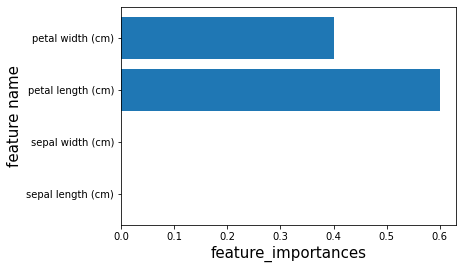

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mglearn.plots import plot_2d_classification

n_feature = len(iris.feature_names) #feature수 구하기

index = [x for x in range(n_feature)] #feature수만큼의 0부터 시작하는 넘파이 어레이 만들기. 리스트도 괜찮음

plt.barh(index, boosting_classifier.feature_importances_, align='center')  # 파라메터로 넘파이 어레이. 다음은 위 분류기중 하나 선택 freature_inportances_, align는 중앙으로 할당

plt.yticks(index, iris.feature_names) #파라메터로 넘파이 어레이, 데이터의 피처 명

plt.xlabel('feature_importances',size=15) # xlabel이름 설정. 크기는 15

plt.ylabel('feature name', size=15)  # ylabel이름 설정. 크기는 15

plt.show()